In [1]:
from fastai.conv_learner import *
from fastai.plots import *
from sklearn.metrics import confusion_matrix
from tools.data_wrangling import folders_to_csv

In [2]:
import seaborn as sns

In [3]:
PATH = 'data/plant-seedlings-classification/'
label_csv = os.path.join(PATH, 'labels.csv')
train_path = os.path.join(PATH, 'train')

Because I want to take advantage of the fastai library, I need to change my training folder directory structure from using a directory for each class,
![folder_training_style](../pictures/plant-seedlings-classification/folder_style.png)

to putting all images into a single train folder and a csv file that describes what species corresponds to each filename
![csv_training_style](../pictures/plant-seedlings-classification/csv_style.png)

In [4]:
folders_to_csv(train_path, label_csv)

label.csv already exists - exiting


In [5]:
pd.read_csv(label_csv).head()

,file,species
0,89b84d6e9.png,Charlock
1,67e37de9b.png,Charlock
2,a30113dfc.png,Charlock
3,88c8cbb35.png,Charlock
4,ba2cfd858.png,Charlock


In [6]:
sz = 224
arch = resnet50
bs = 64

In [7]:
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [8]:
# val_idxs = 0

In [9]:
# !rm -rf {PATH}tmp

In [10]:
def get_data(sz, bs, arch):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv, test_name='test',
                                        val_idxs=val_idxs, tfms=tfms, bs=bs)
    return data.resize(int(sz*1.3)) if sz > 300 else data.resize(340, 'tmp')

In [11]:
data = get_data(sz, bs, arch)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

![cached pictures](../pictures/plant-seedlings-classification/cached_pictures.png)

In [49]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=.5)

initial training for the newly added layer - don't want to mess it up

In [50]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 70%|███████   | 42/60 [00:00<00:00, 45.73it/s, loss=10.3]


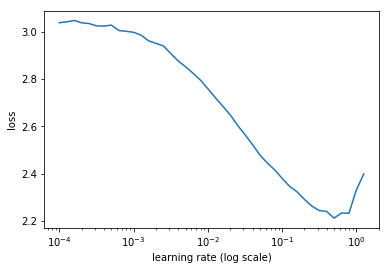

In [51]:
fig = learn.sched.plot()

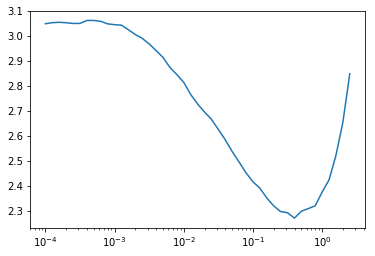

In [15]:
start = 10
end = -2
x = learn.sched.lrs[start:end]
y = learn.sched.losses[start:end]
plt.plot(x, y)
plt.xscale('log')

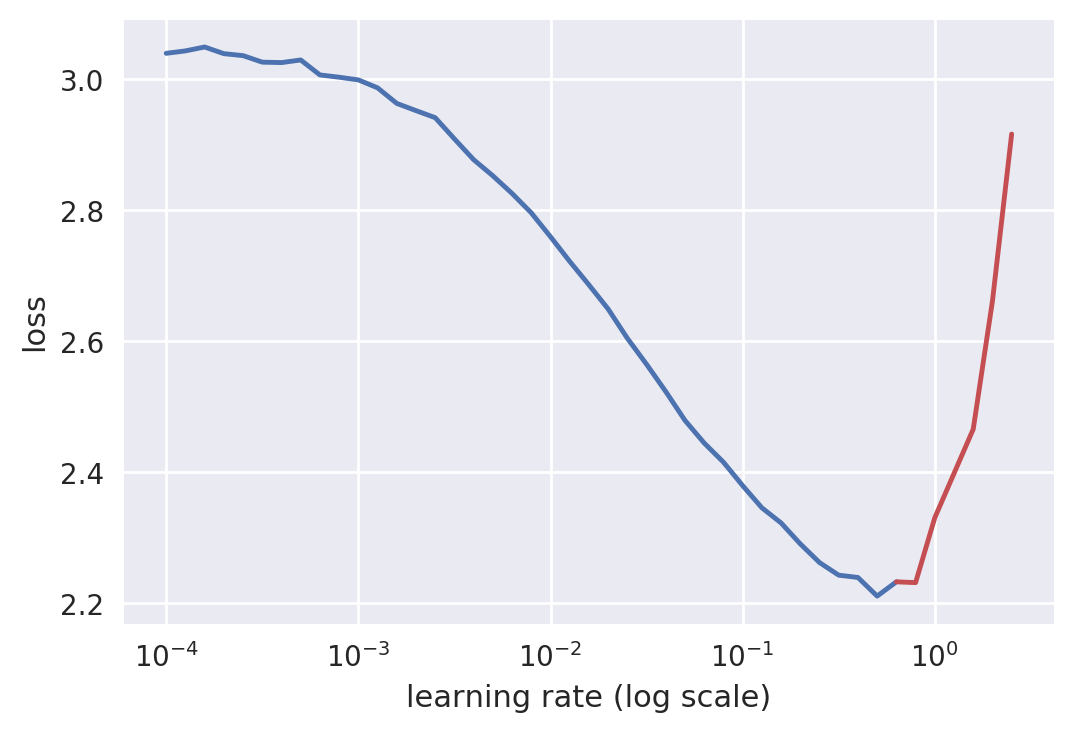

In [53]:
start = 10
end = -2
split = 38
x = learn.sched.lrs[start:end]
y = learn.sched.losses[start:end]
x1, x2 = x[:split+1], x[split:]
y1, y2 = y[:split+1], y[split:]
plt.figure(dpi=200)
plt.plot(x1, y1, color=(sns.color_palette()[0]))
plt.plot(x2, y2, color=(sns.color_palette()[2]))
plt.ylabel("loss")
plt.xlabel("learning rate (log scale)")
plt.xscale('log')
sns.set()

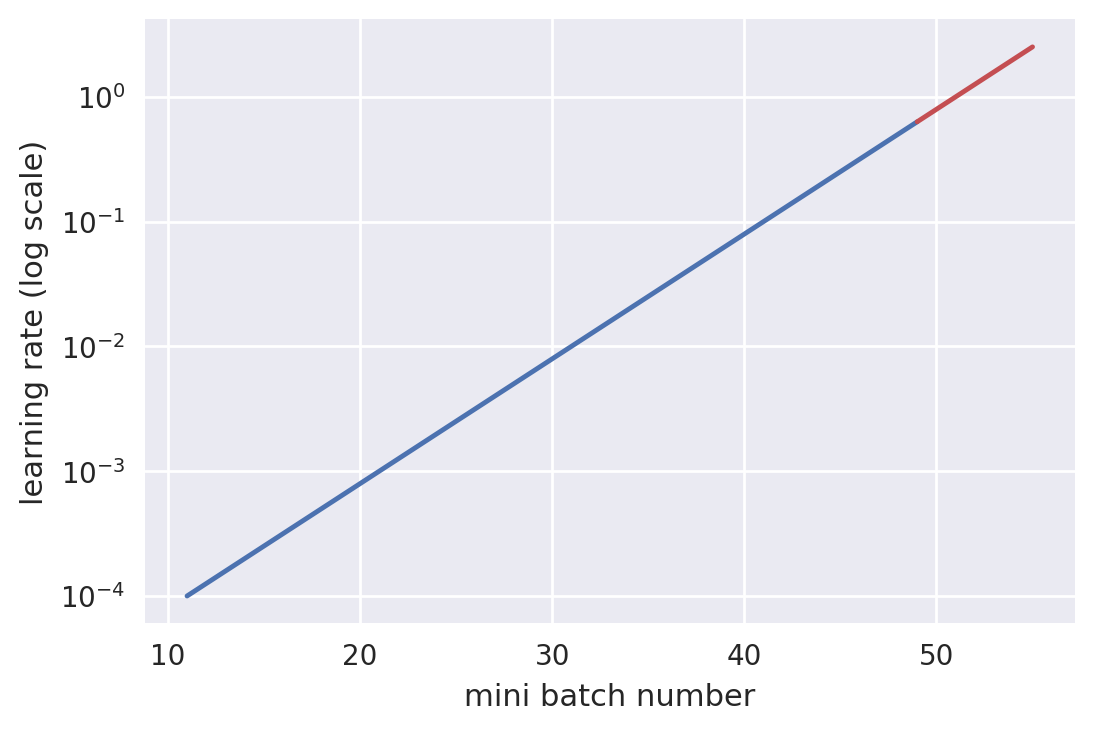

In [61]:
start = 10
end = -2
split = 38
x = learn.sched.iterations[start:end]
y = learn.sched.lrs[start:end]
x1, x2 = x[:split+1], x[split:]
y1, y2 = y[:split+1], y[split:]
plt.figure(dpi=200)
plt.plot(x1, y1, color=(sns.color_palette()[0]))
plt.plot(x2, y2, color=(sns.color_palette()[2]))
plt.ylabel("learning rate (log scale)")
plt.xlabel("mini batch number")
plt.yscale('log')
sns.set()

In [13]:
learn.save('initial')

In [169]:
lrs = [10**(x) for x in range(0, -5, -1)]

In [21]:
lrs = [.1, .03, .01, .003, .001]

In [22]:
lrs

[0.1, 0.03, 0.01, 0.003, 0.001]

In [27]:
losses = []
for lr in lrs:
    learn.load('initial')
    learn.fit(lr, n_cycle=31, use_clr=None)
    losses.append(learn.sched.losses)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

epoch:   0, train_loss: 1.511002, val_loss: 0.928922, accuracy: 0.698534
epoch:   1, train_loss: 1.047556, val_loss: 0.658977, accuracy: 0.777045
epoch:   2, train_loss: 0.781381, val_loss: 0.468720, accuracy: 0.834066
epoch:   3, train_loss: 0.608634, val_loss: 0.430267, accuracy: 0.828665
epoch:   4, train_loss: 0.519237, val_loss: 0.442033, accuracy: 0.834915
epoch:   5, train_loss: 0.467807, val_loss: 0.419001, accuracy: 0.858025
epoch:   6, train_loss: 0.430704, val_loss: 0.404725, accuracy: 0.846373
epoch:   7, train_loss: 0.391336, val_loss: 0.411707, accuracy: 0.858681
epoch:   8, train_loss: 0.365905, val_loss: 0.402598, accuracy: 0.854707
epoch:   9, train_loss: 0.355935, val_loss: 0.398888, accuracy: 0.854707
epoch:  10, train_loss: 0.325428, val_loss: 0.417589, accuracy: 0.862384
epoch:  11, train_loss: 0.324080, val_loss: 0.444783, accuracy: 0.850154
epoch:  12, train_loss: 0.300910, val_loss: 0.399500, accuracy: 0.861613
epoch:  13, train_loss: 0.275622, val_loss: 0.36864

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

epoch:   0, train_loss: 1.187820, val_loss: 0.669936, accuracy: 0.781019
epoch:   1, train_loss: 0.853454, val_loss: 0.517914, accuracy: 0.823071
epoch:   2, train_loss: 0.665280, val_loss: 0.452872, accuracy: 0.840779
epoch:   3, train_loss: 0.581820, val_loss: 0.415702, accuracy: 0.848264
epoch:   4, train_loss: 0.477001, val_loss: 0.409673, accuracy: 0.843248
epoch:   5, train_loss: 0.433785, val_loss: 0.412792, accuracy: 0.840972
epoch:   6, train_loss: 0.409848, val_loss: 0.410173, accuracy: 0.846373
epoch:   7, train_loss: 0.392630, val_loss: 0.359576, accuracy: 0.866358
epoch:   8, train_loss: 0.350600, val_loss: 0.422063, accuracy: 0.860301
epoch:   9, train_loss: 0.323078, val_loss: 0.380725, accuracy: 0.855093
epoch:  10, train_loss: 0.305624, val_loss: 0.361189, accuracy: 0.867207
epoch:  11, train_loss: 0.287191, val_loss: 0.376641, accuracy: 0.863040
epoch:  12, train_loss: 0.289986, val_loss: 0.362790, accuracy: 0.867593
epoch:  13, train_loss: 0.266160, val_loss: 0.36658

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

epoch:   0, train_loss: 1.351068, val_loss: 0.712806, accuracy: 0.773920
epoch:   1, train_loss: 0.902203, val_loss: 0.539933, accuracy: 0.828279
epoch:   2, train_loss: 0.714929, val_loss: 0.467529, accuracy: 0.839082
epoch:   3, train_loss: 0.593277, val_loss: 0.433086, accuracy: 0.851389
epoch:   4, train_loss: 0.521536, val_loss: 0.416515, accuracy: 0.856134
epoch:   5, train_loss: 0.470506, val_loss: 0.402174, accuracy: 0.852816
epoch:   6, train_loss: 0.428457, val_loss: 0.382565, accuracy: 0.858025
epoch:   7, train_loss: 0.394790, val_loss: 0.376293, accuracy: 0.865316
epoch:   8, train_loss: 0.372625, val_loss: 0.364652, accuracy: 0.871759
epoch:   9, train_loss: 0.364329, val_loss: 0.365422, accuracy: 0.867400
epoch:  10, train_loss: 0.329766, val_loss: 0.371800, accuracy: 0.868441
epoch:  11, train_loss: 0.312418, val_loss: 0.362063, accuracy: 0.875540
epoch:  12, train_loss: 0.302555, val_loss: 0.356085, accuracy: 0.860957
epoch:  13, train_loss: 0.294894, val_loss: 0.35095

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

epoch:   0, train_loss: 1.803798, val_loss: 1.069485, accuracy: 0.679012
epoch:   1, train_loss: 1.270366, val_loss: 0.785149, accuracy: 0.762539
epoch:   2, train_loss: 1.008364, val_loss: 0.661988, accuracy: 0.788966
epoch:   3, train_loss: 0.837889, val_loss: 0.591618, accuracy: 0.808295
epoch:   4, train_loss: 0.742348, val_loss: 0.534517, accuracy: 0.818711
epoch:   5, train_loss: 0.658735, val_loss: 0.512484, accuracy: 0.838310
epoch:   6, train_loss: 0.617443, val_loss: 0.484808, accuracy: 0.835378
epoch:   7, train_loss: 0.568878, val_loss: 0.462667, accuracy: 0.840394
epoch:   8, train_loss: 0.519545, val_loss: 0.446225, accuracy: 0.840586
epoch:   9, train_loss: 0.513407, val_loss: 0.439155, accuracy: 0.836420
epoch:  10, train_loss: 0.488579, val_loss: 0.434083, accuracy: 0.850733
epoch:  11, train_loss: 0.463532, val_loss: 0.415458, accuracy: 0.859722
epoch:  12, train_loss: 0.434307, val_loss: 0.407679, accuracy: 0.853279
epoch:  13, train_loss: 0.430653, val_loss: 0.39527

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

epoch:   0, train_loss: 2.286875, val_loss: 1.493843, accuracy: 0.573032
epoch:   1, train_loss: 1.760330, val_loss: 1.165890, accuracy: 0.662809
epoch:   2, train_loss: 1.460429, val_loss: 0.996738, accuracy: 0.703627
epoch:   3, train_loss: 1.264952, val_loss: 0.884149, accuracy: 0.738387
epoch:   4, train_loss: 1.107927, val_loss: 0.809235, accuracy: 0.751080
epoch:   5, train_loss: 1.022404, val_loss: 0.745053, accuracy: 0.760648
epoch:   6, train_loss: 0.944442, val_loss: 0.706873, accuracy: 0.779205
epoch:   7, train_loss: 0.875688, val_loss: 0.662712, accuracy: 0.789159
epoch:   8, train_loss: 0.823836, val_loss: 0.633896, accuracy: 0.795602
epoch:   9, train_loss: 0.776583, val_loss: 0.608085, accuracy: 0.801659
epoch:  10, train_loss: 0.743466, val_loss: 0.583299, accuracy: 0.813310
epoch:  11, train_loss: 0.709608, val_loss: 0.563051, accuracy: 0.819560
epoch:  12, train_loss: 0.685090, val_loss: 0.553068, accuracy: 0.814159
epoch:  13, train_loss: 0.657704, val_loss: 0.53391

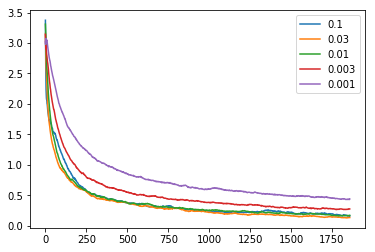

In [28]:
for loss in losses:
    plt.plot(loss)
    plt.legend(lrs)

In [32]:
learn.load('initial')
learn.fit(.03, n_cycle=5, cycle_len=1, cycle_mult=2)
loss_clr = learn.sched.losses

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

epoch:   0, train_loss: 1.273421, val_loss: 0.735958, accuracy: 0.756481
epoch:   1, train_loss: 0.928652, val_loss: 0.546057, accuracy: 0.812847
epoch:   2, train_loss: 0.671028, val_loss: 0.483846, accuracy: 0.829514
epoch:   3, train_loss: 0.634020, val_loss: 0.472353, accuracy: 0.833873
epoch:   4, train_loss: 0.588782, val_loss: 0.409995, accuracy: 0.849691
epoch:   5, train_loss: 0.468090, val_loss: 0.397263, accuracy: 0.850540
epoch:   6, train_loss: 0.413131, val_loss: 0.382021, accuracy: 0.852623
epoch:   7, train_loss: 0.453992, val_loss: 0.441334, accuracy: 0.848071
epoch:   8, train_loss: 0.440932, val_loss: 0.392505, accuracy: 0.854321
epoch:   9, train_loss: 0.400474, val_loss: 0.397441, accuracy: 0.846181
epoch:  10, train_loss: 0.360354, val_loss: 0.360615, accuracy: 0.861806
epoch:  11, train_loss: 0.317660, val_loss: 0.349873, accuracy: 0.868248
epoch:  12, train_loss: 0.272920, val_loss: 0.337270, accuracy: 0.873650
epoch:  13, train_loss: 0.264259, val_loss: 0.33883

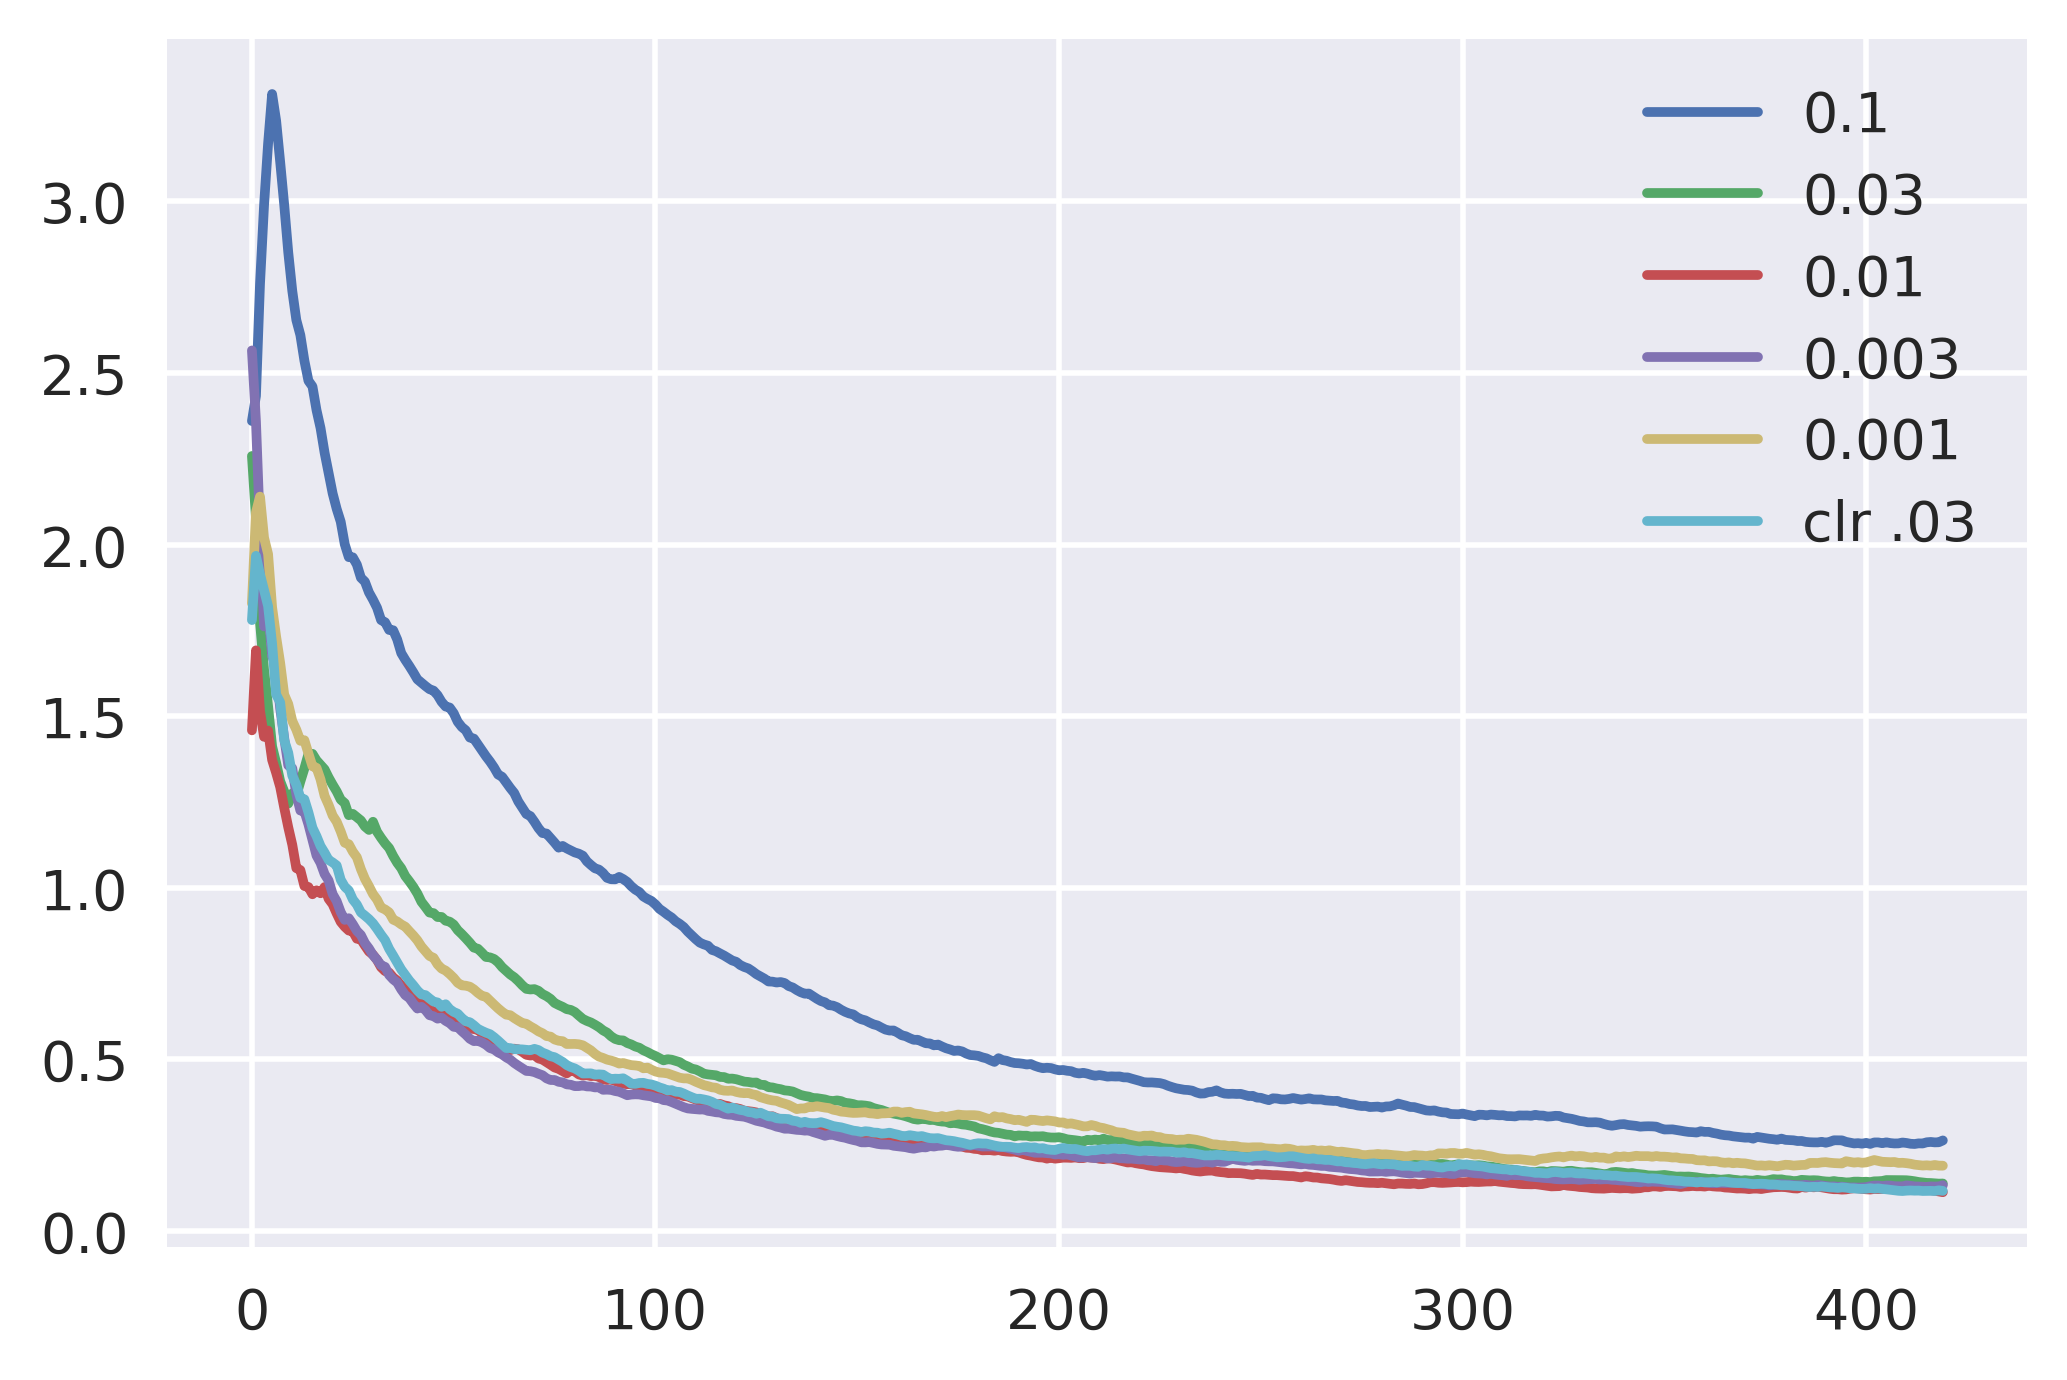

In [63]:
plt.figure(dpi=400)
for loss in losses:
    plt.plot(loss)
plt.plot(loss_clr)
plt.legend(lrs + ['clr .03'])

now a few cycles of data augmentation - I should A/B test this

In [40]:
learn.save('initial')

In [38]:
learn.precompute = False
learn.fit(.01, n_cycle=3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.570437, val_loss: 0.329038, accuracy: 0.885108
epoch:   1, train_loss: 0.538717, val_loss: 0.316988, accuracy: 0.884259
epoch:   2, train_loss: 0.511751, val_loss: 0.308021, accuracy: 0.884066
epoch:   3, train_loss: 0.499634, val_loss: 0.311315, accuracy: 0.877816
epoch:   4, train_loss: 0.464890, val_loss: 0.306265, accuracy: 0.885108
epoch:   5, train_loss: 0.461117, val_loss: 0.293135, accuracy: 0.891358
epoch:   6, train_loss: 0.468499, val_loss: 0.291411, accuracy: 0.887191



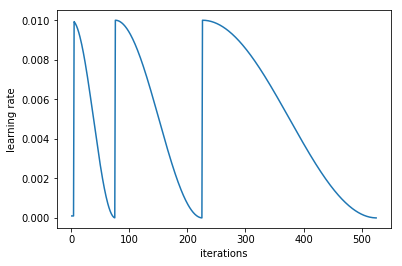

In [18]:
learn.sched.plot_lr()

In [19]:
def model_save_load(filename):
    save_or_load = input()
    if save_or_load == 'save':
        learn.save(filename)
    if save_or_load == 'load':
        learn.load(filename)

In [39]:
model_save_load('initial_training')

NameError: name 'model_save_load' is not defined

In [42]:
learn.unfreeze()

In [43]:
lr = .01

In [44]:
learn.load('initial')
learn.fit([lr/9, lr/3, lr], n_cycle=3, cycle_len=1, cycle_mult=2)
loss_clr = learn.sched.losses

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.573189, val_loss: 0.258939, accuracy: 0.906790
epoch:   1, train_loss: 0.359640, val_loss: 0.185200, accuracy: 0.921296
epoch:   2, train_loss: 0.253683, val_loss: 0.165390, accuracy: 0.936728
epoch:   3, train_loss: 0.221515, val_loss: 0.199810, accuracy: 0.921489
epoch:   4, train_loss: 0.193840, val_loss: 0.114330, accuracy: 0.962500
epoch:   5, train_loss: 0.142861, val_loss: 0.103048, accuracy: 0.961265
epoch:   6, train_loss: 0.116681, val_loss: 0.103433, accuracy: 0.959182



In [47]:
losses = []
for lr in lrs:
    learn.load('initial')
    learn.unfreeze()
    learn.fit([lr/9, lr/3, lr], n_cycle=7, use_clr=None)
    losses.append(learn.sched.losses)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 1.367526, val_loss: 2.247505, accuracy: 0.530671
epoch:   1, train_loss: 0.788013, val_loss: 0.538029, accuracy: 0.815316
epoch:   2, train_loss: 0.511568, val_loss: 0.299087, accuracy: 0.887577
epoch:   3, train_loss: 0.409599, val_loss: 0.335453, accuracy: 0.885494
epoch:   4, train_loss: 0.339876, val_loss: 0.461170, accuracy: 0.855093
epoch:   5, train_loss: 0.290514, val_loss: 0.193339, accuracy: 0.925849
epoch:   6, train_loss: 0.263658, val_loss: 0.219167, accuracy: 0.921103



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.796963, val_loss: 0.354123, accuracy: 0.861343
epoch:   1, train_loss: 0.443851, val_loss: 0.263337, accuracy: 0.905285
epoch:   2, train_loss: 0.304262, val_loss: 0.146578, accuracy: 0.938812
epoch:   3, train_loss: 0.245430, val_loss: 0.148218, accuracy: 0.946296
epoch:   4, train_loss: 0.194221, val_loss: 0.170644, accuracy: 0.938349
epoch:   5, train_loss: 0.154100, val_loss: 0.109485, accuracy: 0.960031
epoch:   6, train_loss: 0.138160, val_loss: 0.107777, accuracy: 0.961265



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.555331, val_loss: 0.421882, accuracy: 0.879900
epoch:   1, train_loss: 0.357922, val_loss: 0.177877, accuracy: 0.926698
epoch:   2, train_loss: 0.239152, val_loss: 0.154616, accuracy: 0.938542
epoch:   3, train_loss: 0.172902, val_loss: 0.117401, accuracy: 0.960417
epoch:   4, train_loss: 0.142632, val_loss: 0.126010, accuracy: 0.954167
epoch:   5, train_loss: 0.130193, val_loss: 0.102524, accuracy: 0.965625
epoch:   6, train_loss: 0.112820, val_loss: 0.103755, accuracy: 0.962500



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.532775, val_loss: 0.221561, accuracy: 0.926505
epoch:   1, train_loss: 0.338332, val_loss: 0.165495, accuracy: 0.934838
epoch:   2, train_loss: 0.250583, val_loss: 0.157618, accuracy: 0.945062
epoch:   3, train_loss: 0.203427, val_loss: 0.136502, accuracy: 0.949614
epoch:   4, train_loss: 0.170065, val_loss: 0.126611, accuracy: 0.950270
epoch:   5, train_loss: 0.142242, val_loss: 0.123587, accuracy: 0.956713
epoch:   6, train_loss: 0.133214, val_loss: 0.138333, accuracy: 0.946296



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.670723, val_loss: 0.294117, accuracy: 0.884066
epoch:   1, train_loss: 0.409212, val_loss: 0.207618, accuracy: 0.929437
epoch:   2, train_loss: 0.337222, val_loss: 0.180393, accuracy: 0.932948
epoch:   3, train_loss: 0.251922, val_loss: 0.164142, accuracy: 0.943171
epoch:   4, train_loss: 0.225010, val_loss: 0.157476, accuracy: 0.944213
epoch:   5, train_loss: 0.205506, val_loss: 0.147436, accuracy: 0.947338
epoch:   6, train_loss: 0.190068, val_loss: 0.132569, accuracy: 0.951505



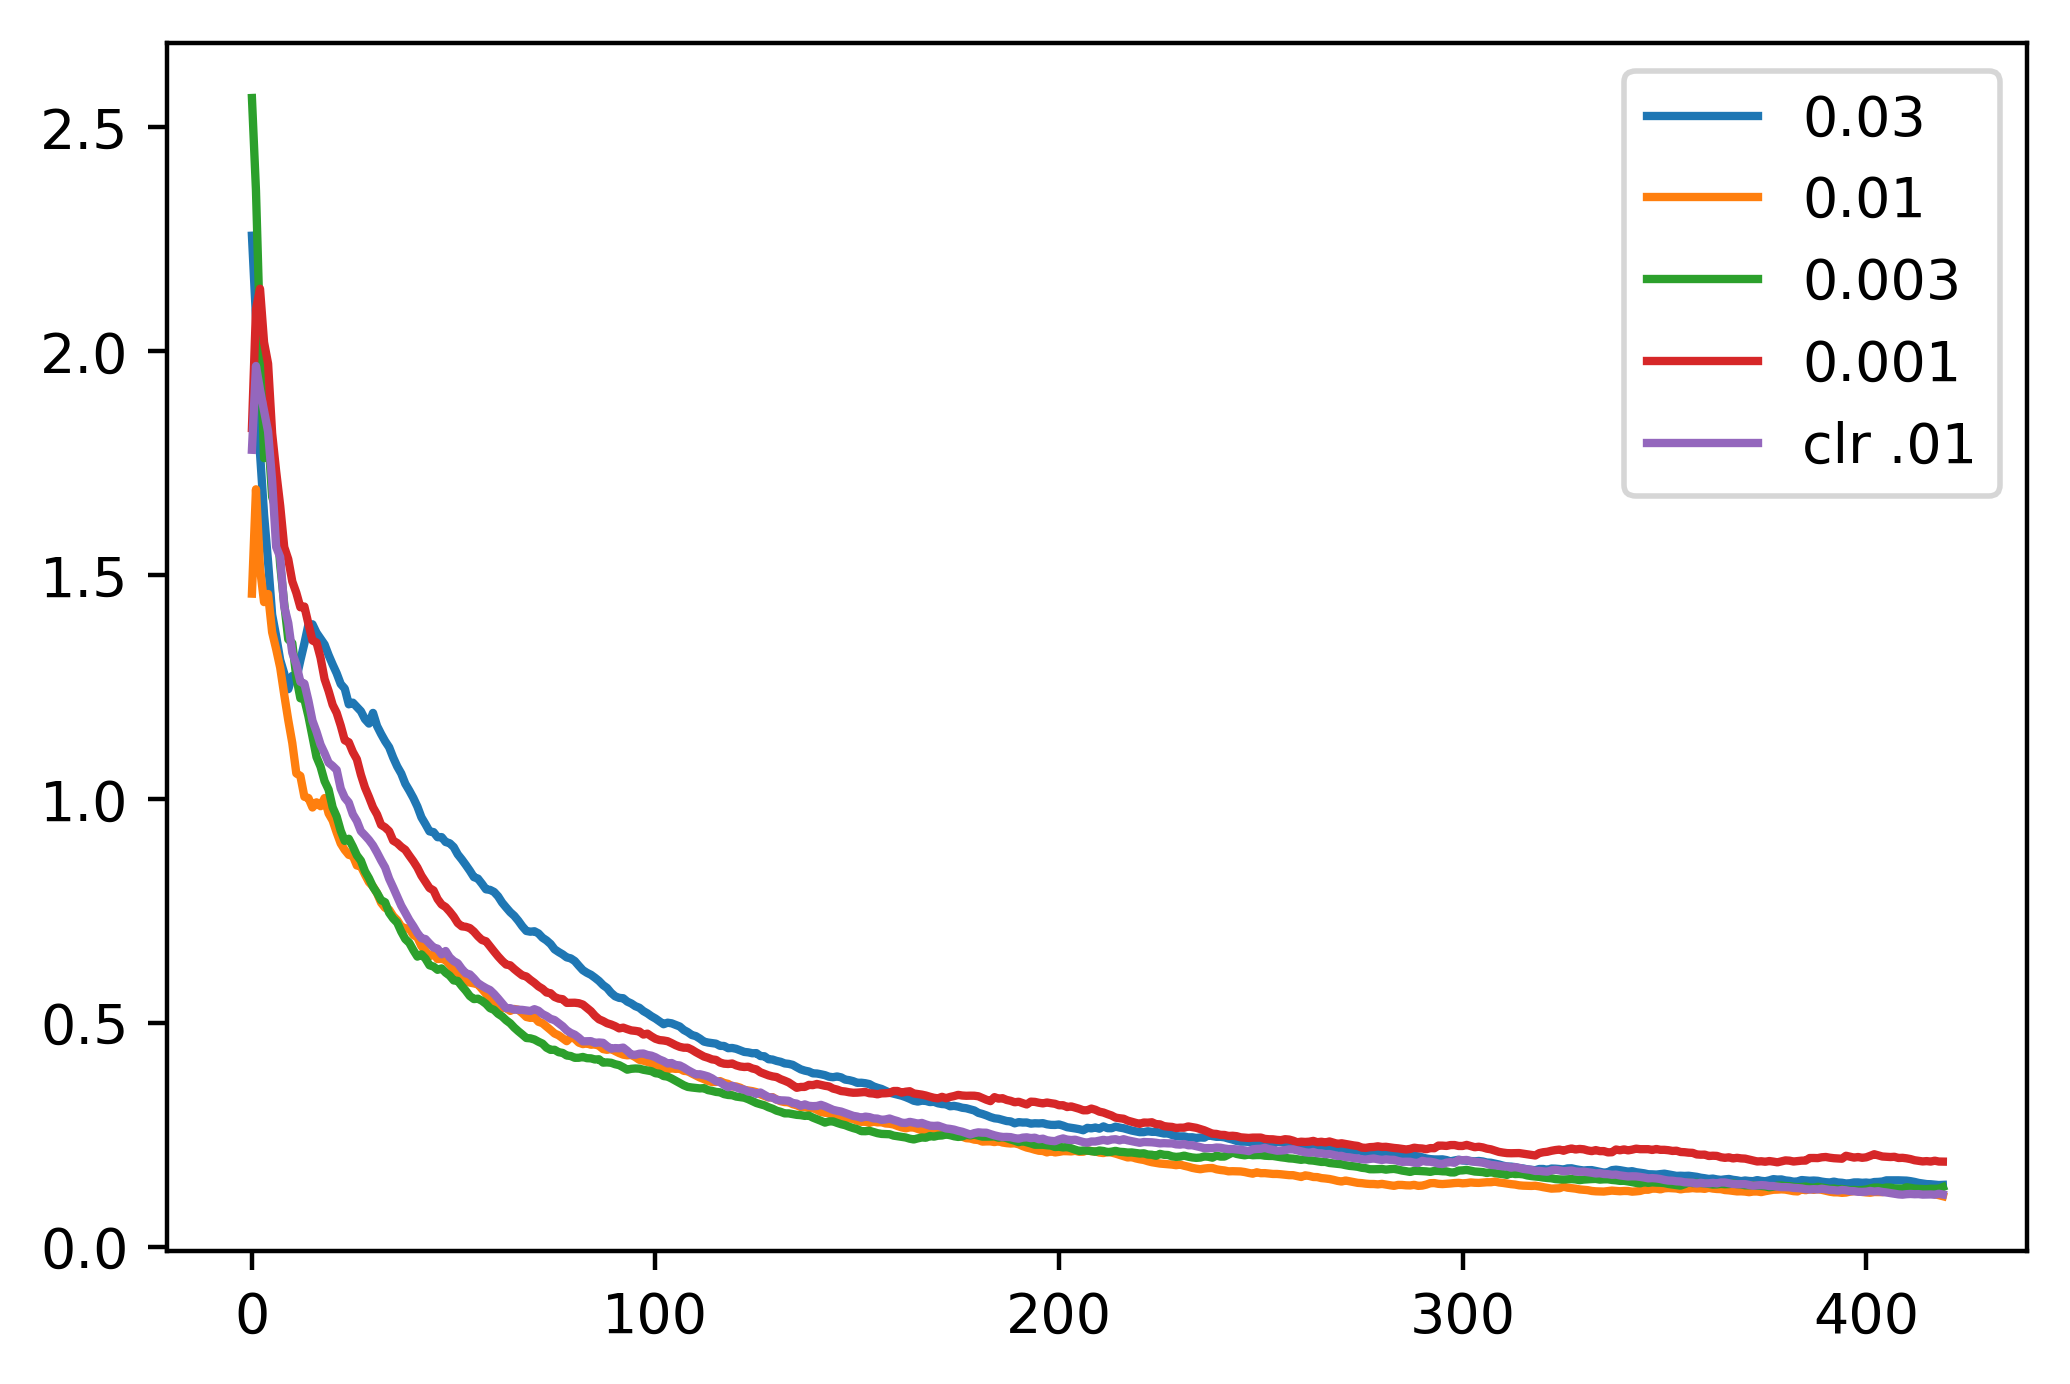

In [48]:
plt.figure(dpi=400)
for loss in losses[1:]:
    plt.plot(loss)
plt.plot(loss_clr)
plt.legend(lrs[1:] + ['clr .01'])

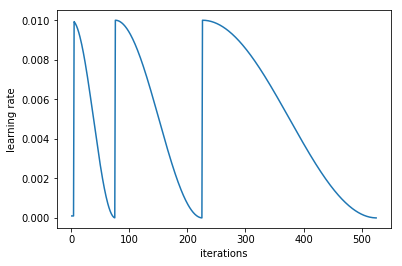

In [23]:
learn.sched.plot_lr()

In [24]:
model_save_load('resnet50_224')

save


In [25]:
learn.set_data(get_data(299,32,arch,label_csv))
learn.precompute = False
learn.unfreeze()

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [26]:
lr = .01

In [27]:
learn.fit([lr/9, lr/3, lr], n_cycle=3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.188035, val_loss: 0.007355, accuracy: 1.000000
epoch:   1, train_loss: 0.179518, val_loss: 0.029436, accuracy: 1.000000
epoch:   2, train_loss: 0.120721, val_loss: 0.020514, accuracy: 1.000000
epoch:   3, train_loss: 0.157036, val_loss: 0.156203, accuracy: 1.000000
epoch:   4, train_loss: 0.112107, val_loss: 0.005205, accuracy: 1.000000
epoch:   5, train_loss: 0.075675, val_loss: 0.059178, accuracy: 1.000000
epoch:   6, train_loss: 0.063902, val_loss: 0.063752, accuracy: 1.000000



In [28]:
n_cycle = 5

In [29]:
learn.fit([lr/9, lr/3, lr], n_cycle=n_cycle, cycle_len=4, cycle_mult=1, cycle_save_name='ensemble')

HBox(children=(IntProgress(value=0, description='Epoch', max=20), HTML(value='')))

epoch:   0, train_loss: 0.097088, val_loss: 0.018319, accuracy: 1.000000
epoch:   1, train_loss: 0.073988, val_loss: 0.034222, accuracy: 1.000000
epoch:   2, train_loss: 0.055121, val_loss: 0.155578, accuracy: 1.000000
epoch:   3, train_loss: 0.056097, val_loss: 0.142830, accuracy: 1.000000
epoch:   4, train_loss: 0.077097, val_loss: 0.032986, accuracy: 1.000000
epoch:   5, train_loss: 0.060424, val_loss: 0.406859, accuracy: 1.000000
epoch:   6, train_loss: 0.038940, val_loss: 0.118100, accuracy: 1.000000
epoch:   7, train_loss: 0.044501, val_loss: 0.129872, accuracy: 1.000000
epoch:   8, train_loss: 0.054164, val_loss: 0.024628, accuracy: 1.000000
epoch:   9, train_loss: 0.041293, val_loss: 0.442189, accuracy: 1.000000
epoch:  10, train_loss: 0.036228, val_loss: 0.013837, accuracy: 1.000000
epoch:  11, train_loss: 0.025590, val_loss: 0.014735, accuracy: 1.000000
epoch:  12, train_loss: 0.041849, val_loss: 0.096907, accuracy: 1.000000
epoch:  13, train_loss: 0.051811, val_loss: 0.06883

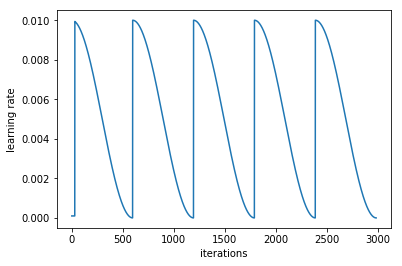

In [30]:
learn.sched.plot_lr()

In [42]:
log_preds_all = []
for i in range(n_cycle):
    learn.load(f'ensemble_cyc_{i}')
    log_preds, _ = learn.TTA(is_test=True, n_aug=8)
    log_preds = np.mean(log_preds, axis=0)
    log_preds_all.append(log_preds)

In [43]:
log_preds_mean = np.mean(np.array(log_preds_all), axis=0)

In [44]:
preds = np.argmax(np.exp(log_preds_mean), axis=1)

In [ ]:
# log_preds, _ = learn.TTA(is_test=False, n_aug=8)
# log_preds = np.mean(log_preds, axis=0)
# preds = np.argmax(np.exp(log_preds), axis=1)

In [ ]:
cm = confusion_matrix(y, preds); cm

In [ ]:
imr = ImageModelResults(data.val_ds, log_preds)

In [ ]:
imr.plot_most_correct(0)

In [ ]:
imr.plot_most_correct(6)

In [ ]:
imr.plot_most_incorrect(0)

In [ ]:
imr.plot_most_incorrect(6)

In [ ]:
data.classes[0]

In [ ]:
data.classes[6]

In [ ]:
# def test_predictions(learn):
#     log_preds,y = learn.TTA(is_test=True, n_aug=8)
#     probs = np.mean(np.exp(log_preds), axis=0)
#     preds = np.argmax(probs, axis=1)
#     return preds

In [ ]:
# preds = test_predictions(learn)

In [45]:
def kaggle_submit(PATH, preds, data, sub_num):
    class_preds = [data.classes[x].replace('_', ' ') for x in preds]

    assert(len(class_preds) == len(data.test_ds.fnames))

    files = [x.split('/')[-1] for x in data.test_ds.fnames]

    df = pd.DataFrame(list(zip(files, class_preds)))
    df.columns = ['file', 'species']

    submit_folder = os.path.join(PATH, 'submit')
    submit_filepath = os.path.join(submit_folder, f'plant_submission{sub_num}.gz')
    os.makedirs(submit_folder, exist_ok=True)
    df.to_csv(submit_filepath, compression='gzip', index=False)
    return submit_filepath

In [46]:
print(kaggle_submit(PATH, preds, data, '1'))

data/plant-seedlings-classification/submit/plant_submission0.gz
